In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
from datasets import load_dataset

# Load the emotion dataset
dataset = load_dataset("dair-ai/emotion")


'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: d4b29072-699a-4f30-af08-04fffdfb766c)')' thrown while requesting HEAD https://huggingface.co/datasets/dair-ai/emotion/resolve/main/README.md
Retrying in 1s [Retry 1/5].


In [42]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [43]:
print(dataset["train"][0])
print(dataset["validation"][1])
print(dataset["test"][2])

{'text': 'i didnt feel humiliated', 'label': 0}
{'text': 'i feel like i am still looking at a blank canvas blank pieces of paper', 'label': 0}
{'text': 'i never make her separate from me because i don t ever want her to feel like i m ashamed with her', 'label': 0}


 ## convert all 3 datasets into csv file 

In [44]:

train_data = pd.DataFrame(dataset['train'])
train_data.to_csv("emotion_train.csv", index=False)

In [45]:

val_data = pd.DataFrame(dataset['validation'])
val_data.to_csv("emotion_val.csv", index=False)

In [46]:

test_data = pd.DataFrame(dataset['test'])
test_data.to_csv("emotion_test.csv", index=False)

## create a dataframe for train, validation and test dataset

In [47]:
df_tr = pd.DataFrame(dataset["train"])
df_tr.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [48]:
# check number of rows and columns
df_tr.shape 

(16000, 2)

In [49]:
# check all items
df_tr.size

32000

In [50]:

df_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [51]:
df_tr.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [52]:
df_tr.columns

Index(['text', 'label'], dtype='object')

In [53]:
df_val = pd.DataFrame(dataset["validation"])
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [54]:
df_val.shape

(2000, 2)

In [55]:
df_val.size

4000

In [56]:
df_val.describe()

,label
count,2000.000000
mean,1.569000
std,1.480991
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [57]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [58]:
df_val.columns

Index(['text', 'label'], dtype='object')

In [59]:
df_te = pd.DataFrame(dataset["test"])
df_te.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [60]:
df_te.shape

(2000, 2)

In [61]:
df_te.size

4000

In [62]:
df_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [63]:
df_te.describe()

,label
count,2000.00000
mean,1.53200
std,1.47447
min,0.00000
25%,0.00000
50%,1.00000
75%,3.00000
max,5.00000


In [64]:
df_te.columns

Index(['text', 'label'], dtype='object')

In [65]:
# import train test split
from sklearn.model_selection import train_test_split

In [66]:
# input and output of training dataset
X_tr = df_tr["text"]
y_tr = df_tr["label"]

In [67]:
X_tr

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [68]:
y_tr

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [69]:
# input and output of validation dataset
X_val = df_val["text"]
y_val = df_val["label"]



In [70]:
X_val

0       im feeling quite sad and sorry for myself but ...
1       i feel like i am still looking at a blank canv...
2                          i feel like a faithful servant
3                       i am just feeling cranky and blue
4       i can have for a treat or if i am feeling festive
                              ...                        
1995    im having ssa examination tomorrow in the morn...
1996    i constantly worry about their fight against n...
1997    i feel its important to share this info for th...
1998    i truly feel that if you are passionate enough...
1999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 2000, dtype: object

In [71]:
y_val

0       0
1       0
2       2
3       3
4       1
       ..
1995    0
1996    1
1997    1
1998    1
1999    1
Name: label, Length: 2000, dtype: int64

In [72]:
# convert string to vector make it readable by machine
from sklearn.feature_extraction.text import TfidfVectorizer

# choose the logistic model
from sklearn.linear_model import LogisticRegression

# import classification and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# convert trainig dataset into vector
vectorizer = TfidfVectorizer(max_features=5000)
X_tr_vec = vectorizer.fit_transform(X_tr)
# we do not use y_tr here because it is already encoded
X_val_vec = vectorizer.transform(X_val)


In [ ]:
model = LogisticRegression(max_iter=1000)
# use X_tr_vec because it is input after converted into vector  and y_tr already in vector
model.fit(X_tr_vec, y_tr)


LogisticRegression(max_iter=1000)

In [ ]:
# yahan pe hmm check kar rahein hai ki jo result hamne nikala wo validation wale se kitna match karta hai
y_pred = model.predict(X_val_vec)

# ek classification report reday kardi 
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90       550
           1       0.85      0.94      0.90       704
           2       0.89      0.63      0.74       178
           3       0.91      0.82      0.87       275
           4       0.85      0.75      0.80       212
           5       0.84      0.58      0.69        81

    accuracy                           0.86      2000
   macro avg       0.87      0.78      0.81      2000
weighted avg       0.86      0.86      0.86      2000



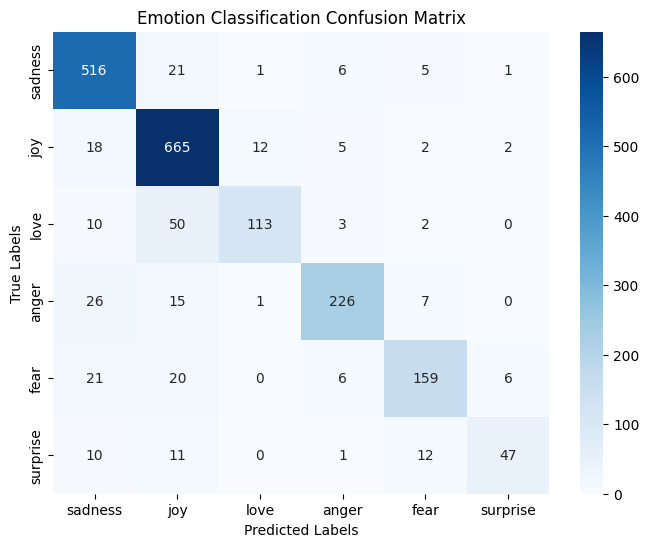

In [76]:
cm = confusion_matrix(y_val, y_pred)

# Get label names
labels = dataset["train"].features["label"].names

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Emotion Classification Confusion Matrix")
plt.show()

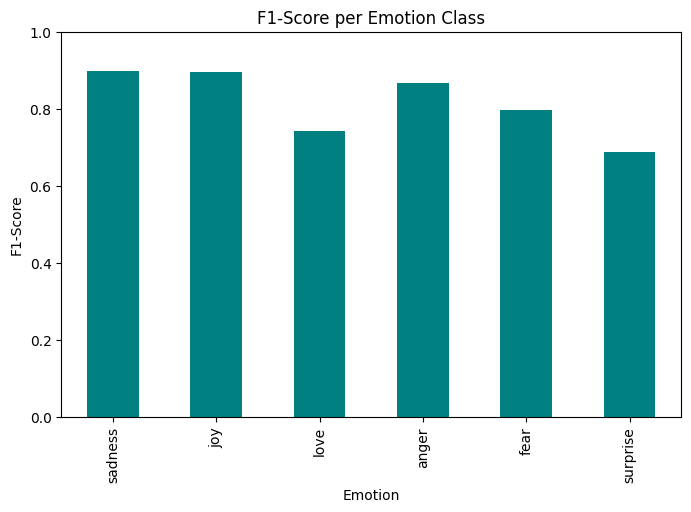

In [78]:
from sklearn.metrics import classification_report
import pandas as pd

# Convert classification report to a DataFrame
report = classification_report(y_val, y_pred, target_names=labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Plot only emotion classes
df_report[:-3]["f1-score"].plot(kind='bar', color='teal', figsize=(8,5))
plt.title("F1-Score per Emotion Class")
plt.ylabel("F1-Score")
plt.xlabel("Emotion")
plt.ylim(0, 1)
plt.show()


## to check emotion from new data

In [77]:
text = ["I am very excited to see you!"]
text_vec = vectorizer.transform(text)
pred = model.predict(text_vec)
print("Predicted emotion:", dataset["train"].features["label"].names[pred[0]])


Predicted emotion: joy
